In [40]:
from fun_basis_Q_learning import *

max_episode_steps = 500
scale = 0.5
alpha = 0.2
nvec = 15

env = UnbalancedDisk_limit(dt=0.025, umax=3.)
env = gym.wrappers.time_limit.TimeLimit(env,max_episode_steps)
env = Discretize(env,20)

# basis_fun, theta = train_theta(env,nvec,scale,alpha)

# # with open('model/theta_opt_best','wb') as theta_opt:
# #    pickle.dump(theta,theta_opt)

# # basis_fun = make_radial_basis_network(env,nvec,scale)
# # with open('model/theta_opt_test', 'rb') as theta_opt:  
# #     theta = pickle.load(theta_opt)

# Qfun = lambda s: basis_fun(s)@theta

In [41]:
def roll_mean(ar,start=-300,N=30): #smoothing if needed
    s = 1-1/N
    k = start
    out = np.zeros(ar.shape)
    for i,a in enumerate(ar):
        k = s*k + (1-s)*a
        out[i] = k
    return out
    
def Qlearn(env, basis_fun, epsilon=0.1, alpha=0.1, gamma=0.99, nsteps=100_000, verbose=False):
    #theta = (Nbasis, Na)
    #basis_fun(state) -> (Nbasis)
    #Q(s,.) = basis_fun(state)@theta
    env_time = env
    while not isinstance(env_time,gym.wrappers.time_limit.TimeLimit):
        env_time = env_time.env
    ep_reward = []
    ep_length_id = []
    
    
    obs = env.reset() #d=)
    #init theta:
    Nbasis = basis_fun(obs).shape[0] #d=)
    theta = np.zeros((Nbasis, env.action_space.n))#d=)
    
    Q = lambda s: basis_fun(s)@theta #short-hand such that you can call Q(obs)
    
    for z in range(nsteps):
        cum_reward = 0
        if np.random.random()<epsilon: #d)
            u = env.action_space.sample() #d)
        else: #d)
            u = argmax(Q(obs)) #d)
        
        obs_next, reward, done, info = env.step(u) #d=)
        cum_reward += reward
        terminal = done and not info.get('TimeLimit.truncated', False) #terminial state
        
        if terminal:
            TD = Q(obs)[u] - reward #d)
        else:
            TD = Q(obs)[u] - (reward + gamma*np.max(Q(obs_next)))#d)
        
        #update theta
        theta[:,u] -= alpha*TD*basis_fun(obs)#d)
        
        if done:
            if verbose: #print result only when verbose is set to True
                print(cum_reward,z, end=' ') 
            ep_reward.append(cum_reward)#time-keeping
            ep_length_id.append(z)

            obs = env.reset() #d=)
            cum_reward = 0
        else:
            obs = obs_next #d=)
        #print(cum_reward)
    return theta, np.array(ep_length_id), np.array(ep_reward)

def visualize_theta(env, theta, basis_fun):
    # for a given enviroment, theta matrix (Nbasis, Naction) and basis_fun(obs) -> (Nbasis,) 
    # it visualizes the max Q value in state-space.
    low, high = env.observation_space.low, env.observation_space.high
    nvec = [100,120]
    Xvec = [np.linspace(l,h,num=ni) for l,h,ni in zip(low,high,nvec)] # calculate the linspace in all directions
    c_points = np.array(np.meshgrid(*Xvec)) # meshgrid all the linspaces together (Nx, X1, X2, X3, ...) 
    c_points = np.moveaxis(c_points, 0, -1) #transform to (X1, X2, X3, ..., Nobs) 
    c_points = c_points.reshape((-1,c_points.shape[-1])) #flatten into the size (Nc, Nobs)
    maxtheta = np.array([np.max(basis_fun(ci)@theta) for ci in c_points]).reshape((nvec[1],nvec[0]))
    
    plt.contour(Xvec[0],Xvec[1],maxtheta)
    plt.xlabel('$\\theta[rad]$')
    plt.ylabel('$\omega[rad/s]$')
    plt.colorbar()
    plt.show()

scale=0.5 nvec=15
scale=0.5 nvec=15
scale=0.5 nvec=15
scale=0.5 nvec=15


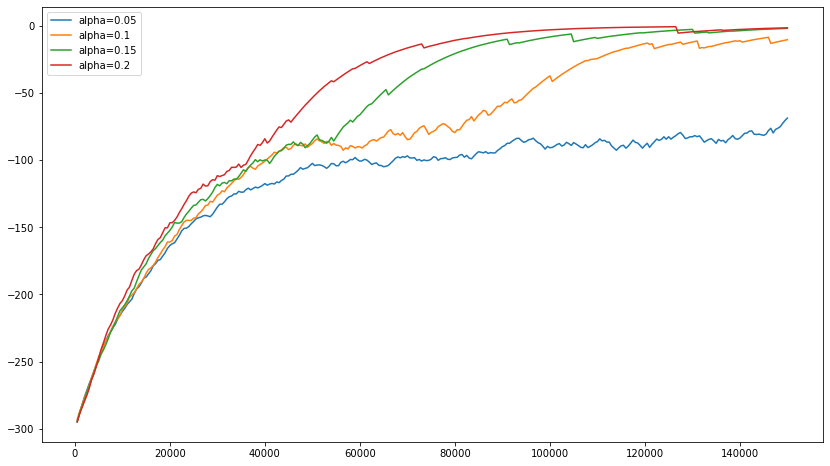

In [43]:
basis_fun = make_radial_basis_network(env,nvec=nvec,scale=scale)#d=)
# theta, ep_length_id, ep_length = Qlearn(env, basis_fun, epsilon=0.2, alpha=alpha, nsteps=100_000)
plt.figure(figsize=(14,8))
for alpha in [0.05, 0.1, 0.15, 0.2]: #d)
    print(f'scale={scale} nvec={nvec}') #d)
    basis_fun = make_radial_basis_network(env,nvec=nvec,scale=scale)#d=)
    theta, ep_length_id, ep_length = Qlearn(env, basis_fun, epsilon=0.2, alpha=alpha, nsteps=150_000,verbose=False)
    plt.plot(ep_length_id, roll_mean(ep_length), label=f'alpha={alpha}')#d)
plt.legend()
plt.show()

scale=0.05 nvec=10


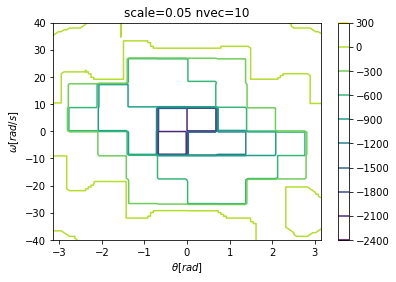

scale=0.05 nvec=12


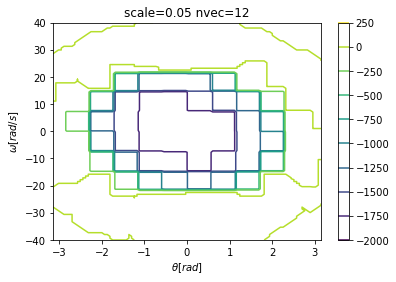

scale=0.05 nvec=15


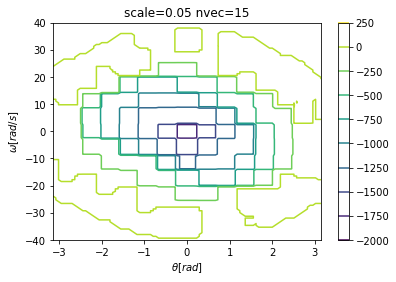

scale=0.05 nvec=18


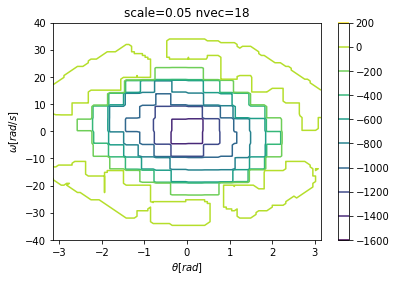

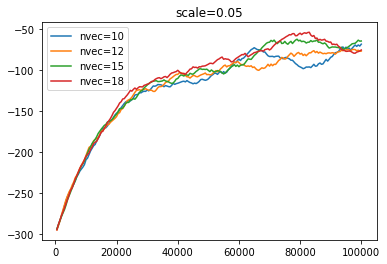

scale=0.1 nvec=10


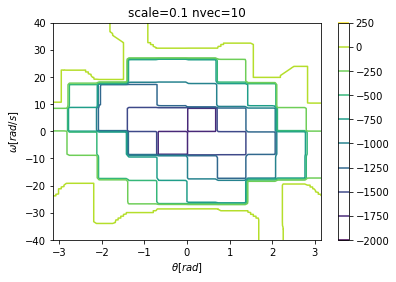

scale=0.1 nvec=12


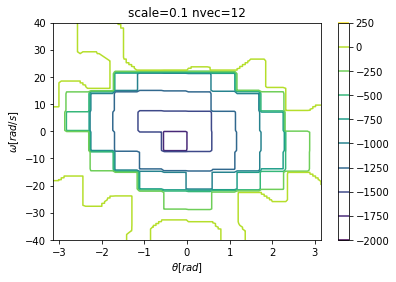

scale=0.1 nvec=15


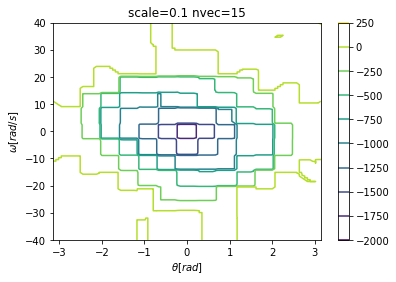

scale=0.1 nvec=18


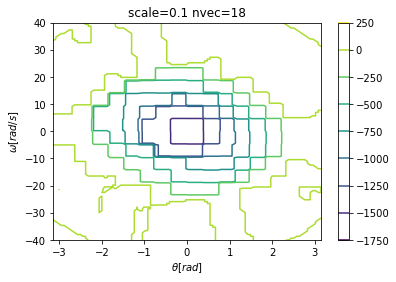

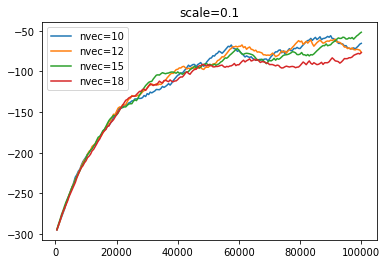

scale=0.2 nvec=10


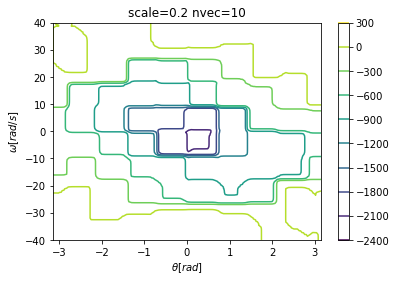

scale=0.2 nvec=12


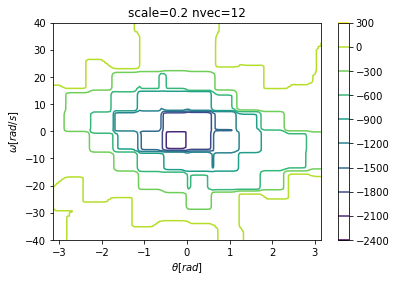

scale=0.2 nvec=15


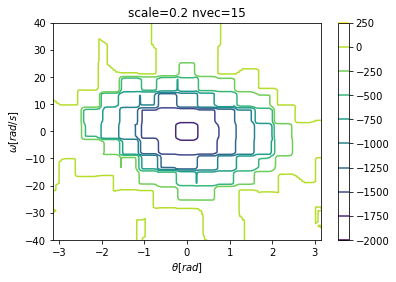

scale=0.2 nvec=18


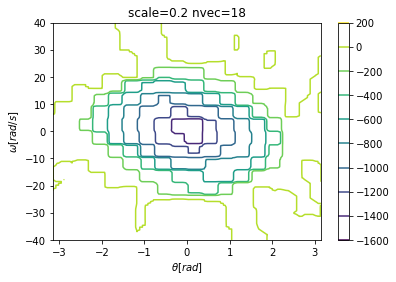

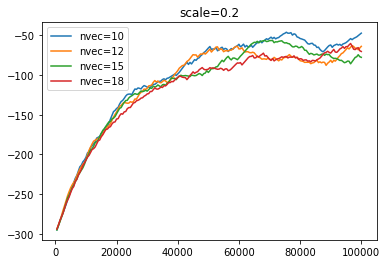

scale=0.5 nvec=10


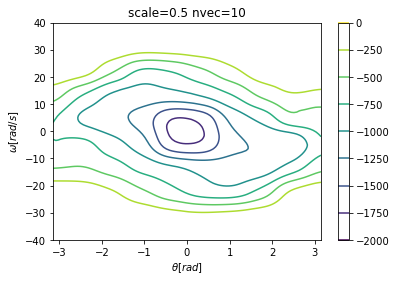

scale=0.5 nvec=12


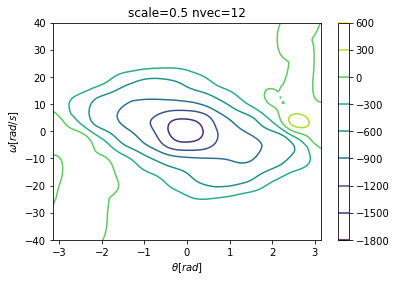

scale=0.5 nvec=15


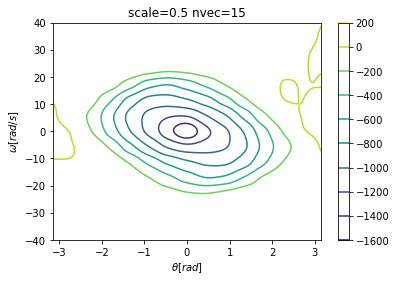

scale=0.5 nvec=18


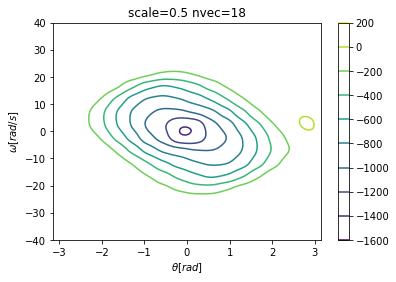

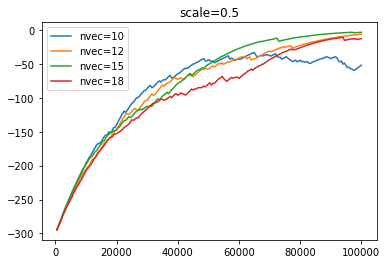

scale=1 nvec=10


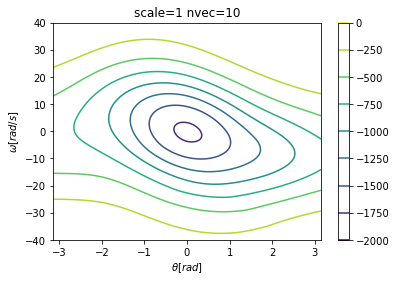

scale=1 nvec=12


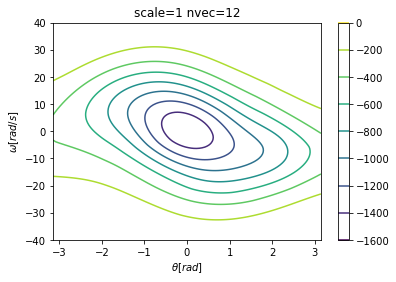

scale=1 nvec=15


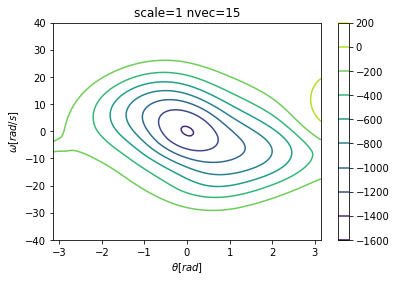

scale=1 nvec=18


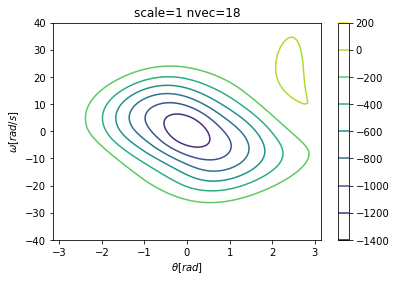

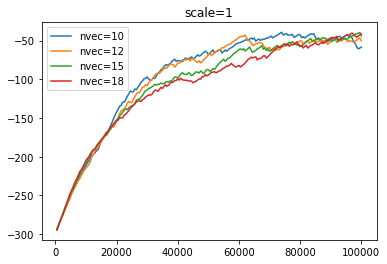

In [39]:
for scale in [0.05, 0.1, 0.2, 0.5, 1]: #e) 
    ep_lengths_buf = [] #e)
    for nvec in [10,12,15,18]: #e)
        print(f'scale={scale} nvec={nvec}') #e)
        basis_fun = make_radial_basis_network(env,nvec,scale=scale) #e)
        theta, ep_length_id, ep_length = Qlearn(env, basis_fun, epsilon=0.2, alpha=alpha, nsteps=100_000,verbose=False) #e)
        ep_lengths_buf.append((ep_length_id, ep_length, nvec)) #e)
        plt.title(f'scale={scale} nvec={nvec}') #e)
        visualize_theta(env, theta, basis_fun) #e)
    
    for ep_length_id, ep_length, nvec in ep_lengths_buf: #e)
        plt.plot(ep_length_id, roll_mean(ep_length), label=f'nvec={nvec}') #e)
    plt.title(f'scale={scale}') #e)
    plt.legend() #e)
    plt.show() #e)